Preamble

In [1]:
# for basic mathematics operation 
import numpy as np
import pandas as pd
from pandas import plotting

# for visualizations
import matplotlib.pyplot as plt
import seaborn as sb
plt.style.use('fivethirtyeight')
fig = plt.gcf() 
fig.set_size_inches(12, 8)

# Implement K-Means
from sklearn.cluster import KMeans

# dis-similarity matrix
from scipy.spatial.distance import squareform
from scipy.spatial.distance import pdist


<Figure size 864x576 with 0 Axes>

load data & DU1

In [2]:
# importing the data set
data_url = "https://raw.githubusercontent.com/SteffiPeTaffy/machineLearningAZ/master/Machine%20Learning%20A-Z%20Template%20Folder/Part%204%20-%20Clustering/Section%2024%20-%20K-Means%20Clustering/Mall_Customers.csv"

df = pd.read_csv(data_url)

df



,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


DU 2

In [3]:
df.describe()


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


DU 3

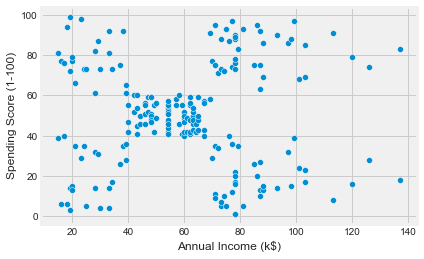

In [4]:
# checking if there is any NULL data

df.isnull().any().any()

# scatterplot of data
plot = sb.scatterplot(x = "Annual Income (k$)", 
                      y = "Spending Score (1-100)",
                      data = df)
plt.show(plot)

DP1

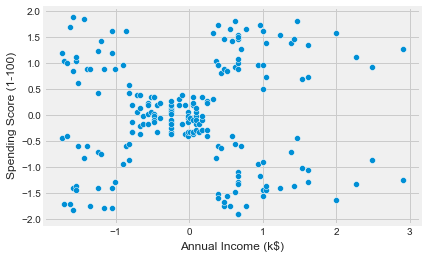

In [5]:


# For step 4, the data have not been standardized - let’s do that now
df_norm = df

df_norm.iloc[:,2] = (df.iloc[:,2] - df.iloc[:,2].mean()) / df.iloc[:,2].std()
df_norm.iloc[:,3] = (df.iloc[:,3] - df.iloc[:,3].mean()) / df.iloc[:,3].std()
df_norm.iloc[:,4] = (df.iloc[:,4] - df.iloc[:,4].mean()) / df.iloc[:,4].std()

df_norm


dm = pd.DataFrame(squareform(pdist(df_norm.iloc[:, 2:])))

dm

# scatterplot - normalized
plot = sb.scatterplot(x = "Annual Income (k$)", 
                      y = "Spending Score (1-100)",
                      data = df_norm)
plt.show(plot)


DP2

In [6]:
df_norm.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,2.000000e+02,2.000000e+02,2.000000e+02
mean,100.500000,-1.021405e-16,-2.131628e-16,-1.376677e-16
std,57.879185,1.000000e+00,1.000000e+00,1.000000e+00
min,1.000000,-1.492590e+00,-1.734646e+00,-1.905240e+00
25%,50.750000,-7.230292e-01,-7.256883e-01,-5.982918e-01
50%,100.500000,-2.040231e-01,3.578945e-02,-7.744877e-03
75%,150.250000,7.266085e-01,6.640086e-01,8.829160e-01
max,200.000000,2.229937e+00,2.910368e+00,1.889750e+00


DU4

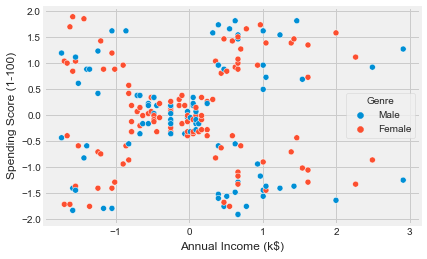

In [7]:
# scatterplot add gender
plot = sb.scatterplot(x = "Annual Income (k$)", 
                       y = "Spending Score (1-100)",
                       hue = "Genre",
                       data = df_norm)
plt.show(plot)

Modeling

In [8]:
# define a KMeans model

# we already ran this line of code  from sklearn.cluster import KMeans
km = KMeans(n_clusters = 5,      
            init = 'k-means++',  
            max_iter = 300,
            n_init = 10,         
            random_state = 0)

# Define the values to which the KMeans model will be applied
vals = df_norm.iloc[:, [3, 4]].values

# Fit the model to the values
y_means = km.fit(vals)

# extract the total within-cluster sum of squares
km.inertia_

km.score(vals)

-65.24056611493822

Sweep of k

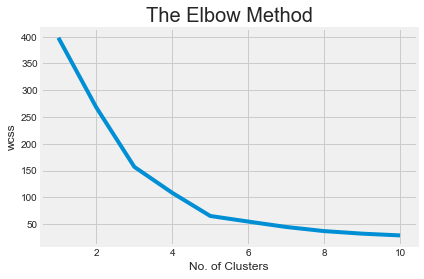

In [9]:



wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, 
                n_init = 10, random_state = 0)
    km.fit(vals)
    wcss.append(km.inertia_)


plot1 = sb.lineplot(x = range(1, 11), y = wcss)
plot1.set_title('The Elbow Method', fontsize = 20)
plot1.set_xlabel('No. of Clusters')
plot1.set_ylabel('wcss')
plt.show(plot1)



Analysis 1a

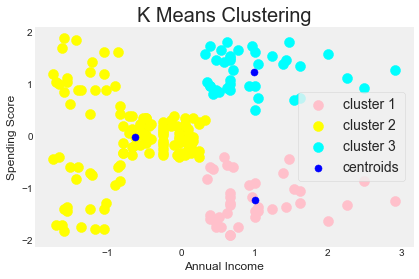

In [10]:
# visualize clusters
km = KMeans(n_clusters = 3, 
            init = 'k-means++', 
            max_iter = 300, 
            n_init = 10, 
            random_state = 0)
            
y_means = km.fit_predict(vals)

plt.scatter(vals[y_means == 0, 0], 
            vals[y_means == 0, 1], 
            s = 100, 
            c = 'pink', 
            label = 'cluster 1')
            
plt.scatter(vals[y_means == 1, 0], 
            vals[y_means == 1, 1], 
            s = 100, 
            c = 'yellow', 
            label = 'cluster 2')
            
plt.scatter(vals[y_means == 2, 0], 
            vals[y_means == 2, 1], 
            s = 100, 
            c = 'cyan', 
            label = 'cluster 3')


            
plt.scatter(km.cluster_centers_[:,0], 
            km.cluster_centers_[:,1], 
            s = 50, 
            c = 'blue', 
            label = 'centroids')

plt.style.use('fivethirtyeight')
plt.title('K Means Clustering', fontsize = 20)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.grid()
plt.show()

Analysis 1b

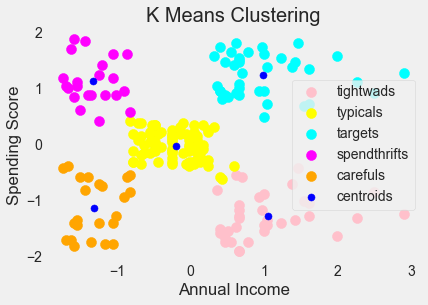

In [11]:
# visualize clusters
km = KMeans(n_clusters = 5, 
            init = 'k-means++', 
            max_iter = 300, 
            n_init = 10, 
            random_state = 0)
            
y_means = km.fit_predict(vals)

plt.scatter(vals[y_means == 0, 0], 
            vals[y_means == 0, 1], 
            s = 100, 
            c = 'pink', 
            label = 'tightwads')
            
plt.scatter(vals[y_means == 1, 0], 
            vals[y_means == 1, 1], 
            s = 100, 
            c = 'yellow', 
            label = 'typicals')
            
plt.scatter(vals[y_means == 2, 0], 
            vals[y_means == 2, 1], 
            s = 100, 
            c = 'cyan', 
            label = 'targets')
            
plt.scatter(vals[y_means == 3, 0], 
            vals[y_means == 3, 1], 
            s = 100, 
            c = 'magenta', 
            label = 'spendthrifts')
            
plt.scatter(vals[y_means == 4, 0], 
            vals[y_means == 4, 1], 
            s = 100, 
            c = 'orange', 
            label = 'carefuls')
            
plt.scatter(km.cluster_centers_[:,0], 
            km.cluster_centers_[:,1], 
            s = 50, 
            c = 'blue', 
            label = 'centroids')

plt.style.use('fivethirtyeight')
plt.title('K Means Clustering', fontsize = 20)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.grid()
plt.show()


Analysis 2 

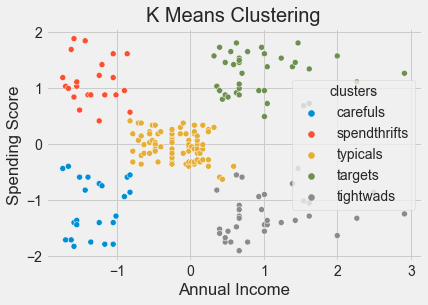

In [12]:
# recreate plot using seaborn
km = KMeans(n_clusters = 5, 
            init = 'k-means++', 
            max_iter = 300, 
            n_init = 10, 
            random_state = 0)
            
y_means = km.fit_predict(vals)

df2 = df_norm
df2["clusters"] = "people"

df2.loc[y_means == 0, "clusters"] = "tightwads"
df2.loc[y_means == 1, "clusters"] = "typicals"
df2.loc[y_means == 2, "clusters"] = "targets"
df2.loc[y_means == 3, "clusters"] = "spendthrifts"
df2.loc[y_means == 4, "clusters"] = "carefuls"

plot2 = sb.scatterplot(x = "Annual Income (k$)",
                       y = "Spending Score (1-100)",
                       hue = 'clusters', 
                       data = df2)

plot2.set_title('K Means Clustering', fontsize = 20)
plot2.set_xlabel('Annual Income')
plot2.set_ylabel('Spending Score')
plt.show(plot2)

Analysis 3 - age & spending score

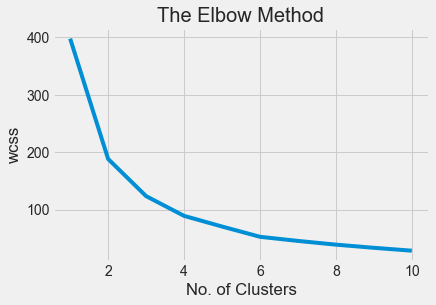

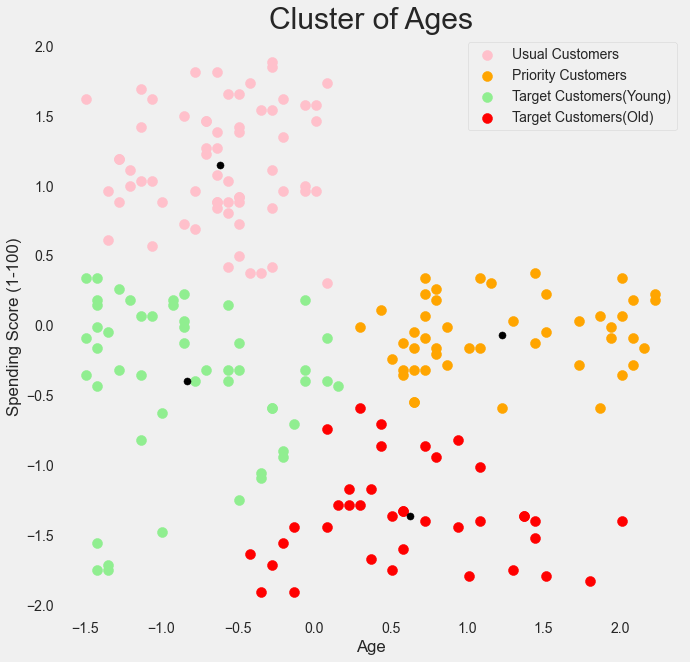

In [13]:
# classify by ages
vals2 = df_norm.iloc[:, [2, 4]].values

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(vals2)
    wcss.append(kmeans.inertia_)


plot1 = sb.lineplot(x = range(1, 11), y = wcss)
plot1.set_title('The Elbow Method', fontsize = 20)
plot1.set_xlabel('No. of Clusters')
plot1.set_ylabel('wcss')
plt.show(plot1)

print("\n")

# visualize age clusters
kmeans = KMeans(n_clusters = 4, 
                init = 'k-means++', 
                max_iter = 300, 
                n_init = 10, 
                random_state = 0)
                
ymeans = kmeans.fit_predict(vals2)

plt.rcParams['figure.figsize'] = (10, 10)
plt.title('Cluster of Ages', fontsize = 30)

plt.scatter(vals2[ymeans == 0, 0], 
            vals2[ymeans == 0, 1], 
            s = 100, 
            c = 'pink', 
            label = 'Usual Customers')
            
plt.scatter(vals2[ymeans == 1, 0], 
            vals2[ymeans == 1, 1], 
            s = 100, 
            c = 'orange', 
            label = 'Priority Customers')
            
plt.scatter(vals2[ymeans == 2, 0], 
            vals2[ymeans == 2, 1], 
            s = 100, 
            c = 'lightgreen', 
            label = 'Target Customers(Young)')
            
plt.scatter(vals2[ymeans == 3, 0], 
            vals2[ymeans == 3, 1], 
            s = 100, 
            c = 'red', 
            label = 'Target Customers(Old)')
            
plt.scatter(kmeans.cluster_centers_[:, 0], 
            kmeans.cluster_centers_[:, 1],
            s = 50, 
            c = 'black')

plt.style.use('fivethirtyeight')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid()
plt.show()


Hierarchical clustering - single linkage

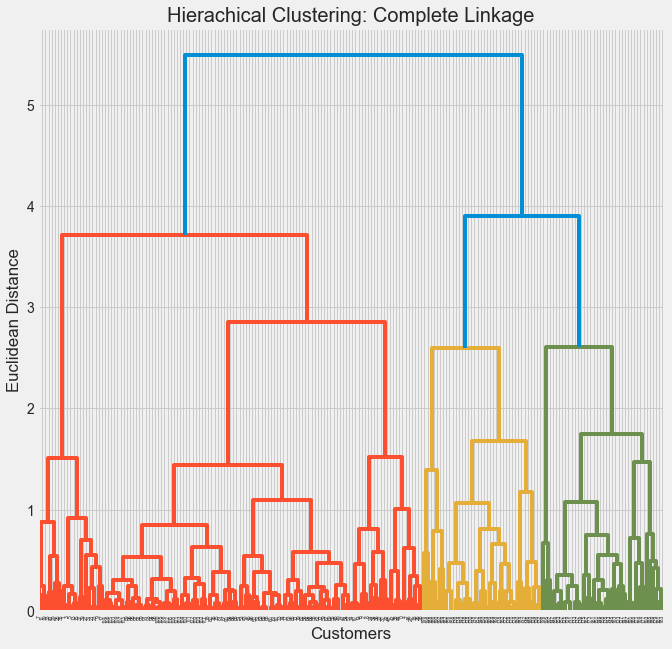

In [14]:
# dendrogram
import scipy.cluster.hierarchy as sch

# recall that vals = df_norm.iloc[:, [3, 4]].values - spending score vs income

dendrogram = sch.dendrogram(sch.linkage(vals, method = 'complete'))
plt.title('Hierachical Clustering: Complete Linkage', fontsize = 20)
plt.xlabel('Customers')
plt.ylabel('Euclidean Distance')
plt.show()



Hierarchical clustering - average linking


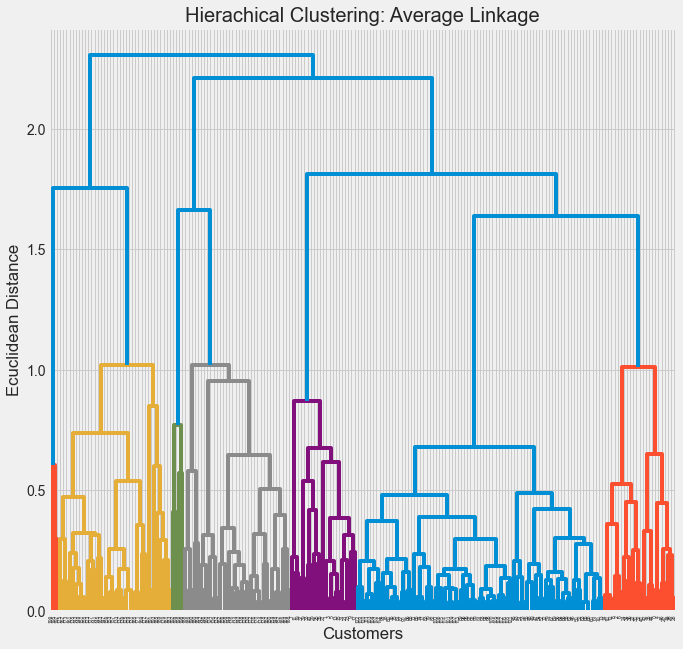

In [15]:
# Mean Or Average Linkage Method dendrogram

import scipy.cluster.hierarchy as sch

dendrogram = sch.dendrogram(sch.linkage(vals, method = 'average'))
plt.title('Hierachical Clustering: Average Linkage', fontsize = 20)
plt.xlabel('Customers')
plt.ylabel('Ecuclidean Distance')
plt.show()


Analysis

In [16]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
cluster.fit_predict(vals)


array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 2,
       4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 0, 1, 0, 1,
       2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1])

Viz

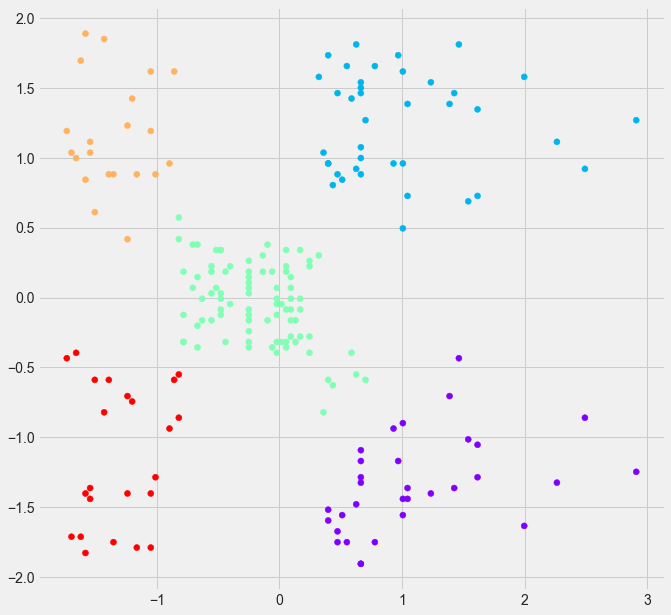

In [17]:
plt.scatter(vals[:,0], vals[:,1], c=cluster.labels_, cmap='rainbow')

Sweep of clusters

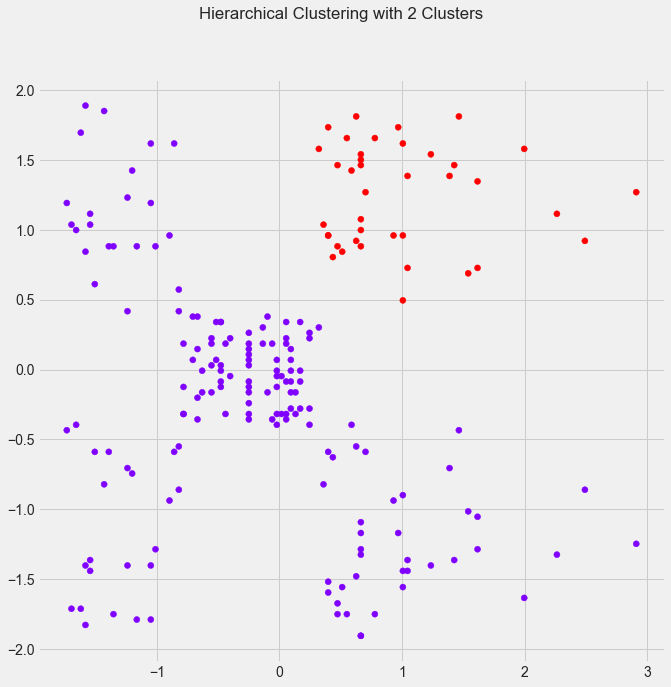

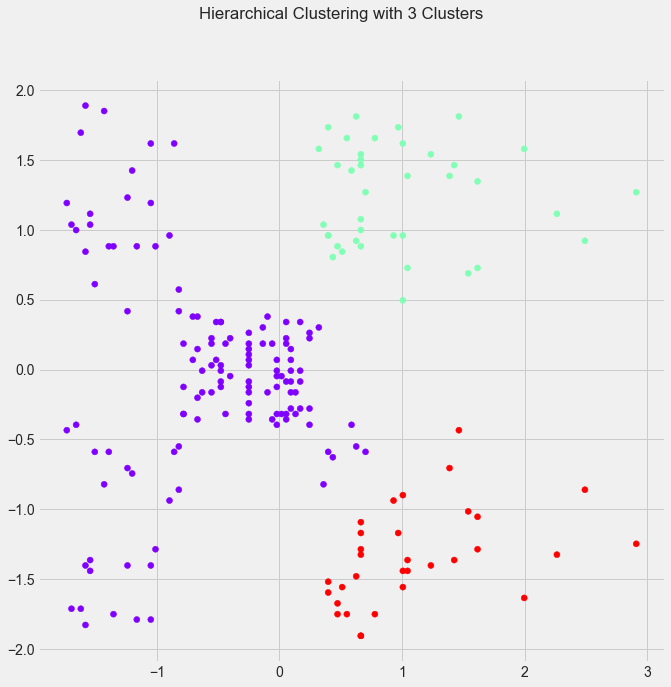

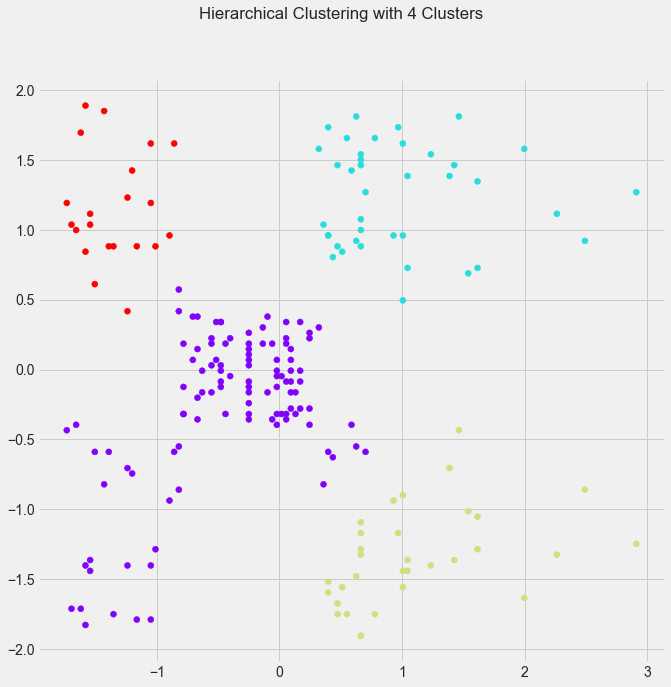

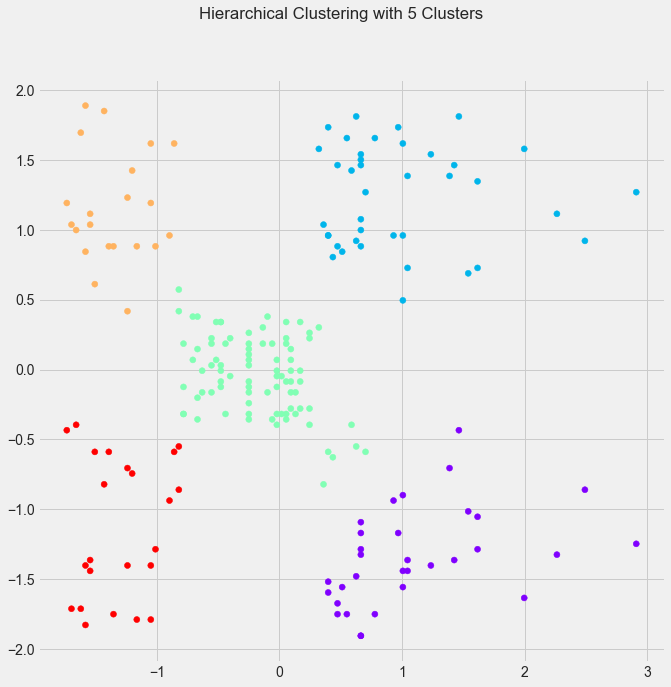

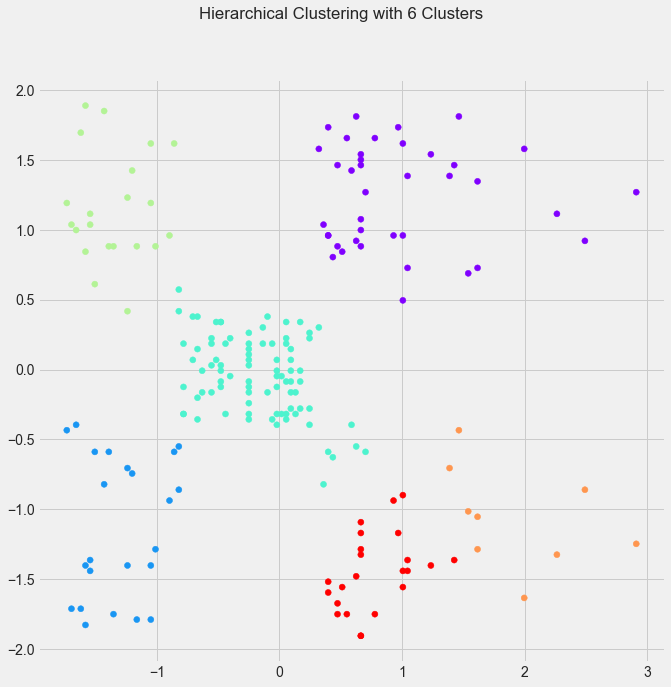

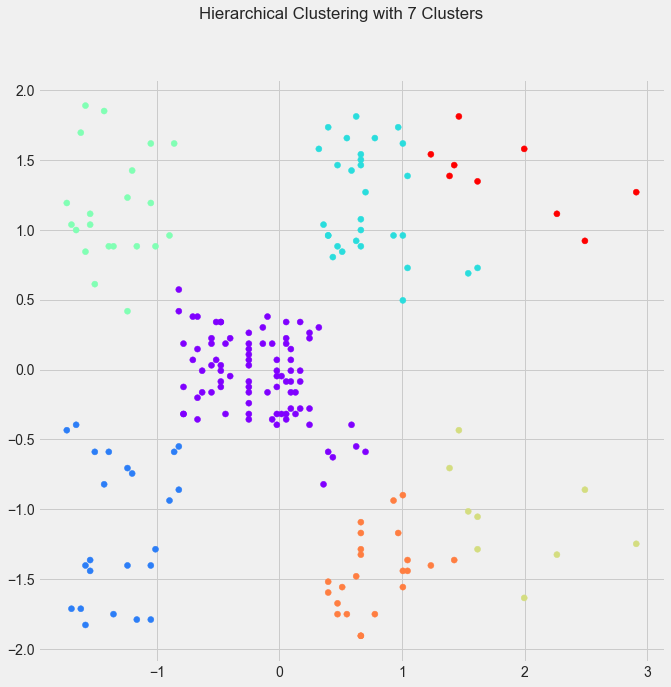

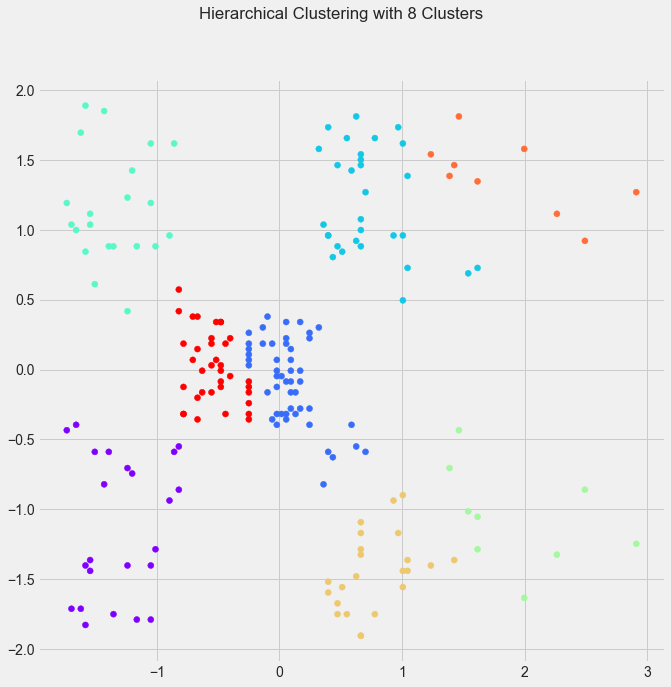

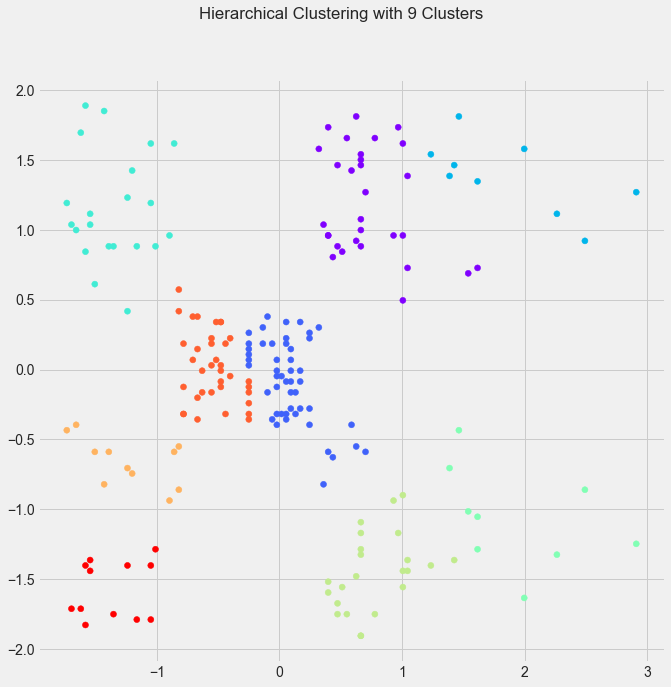

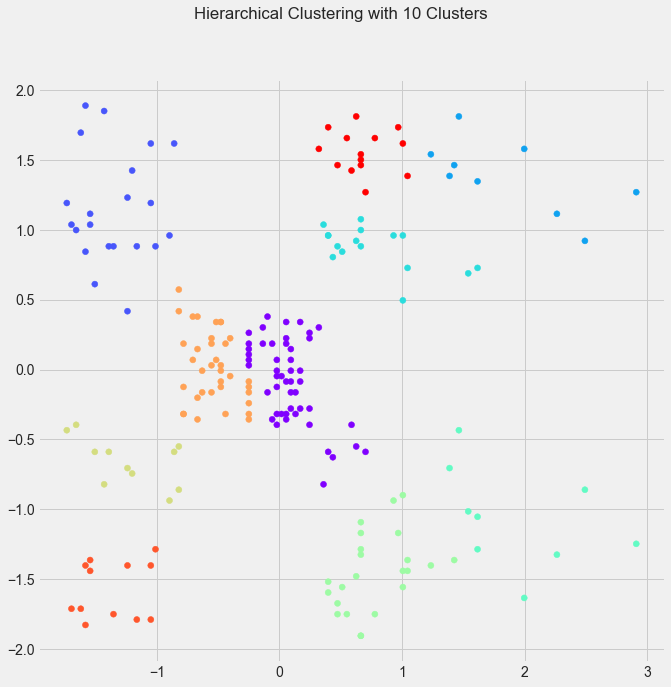

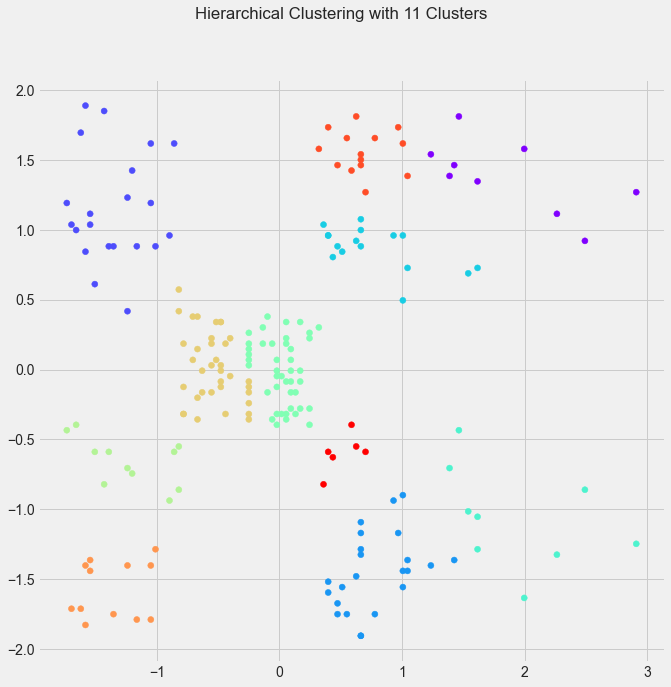

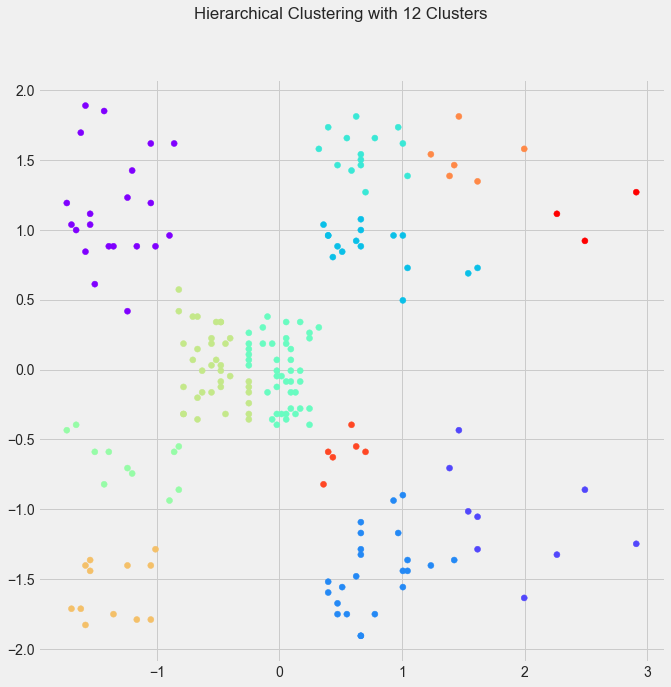

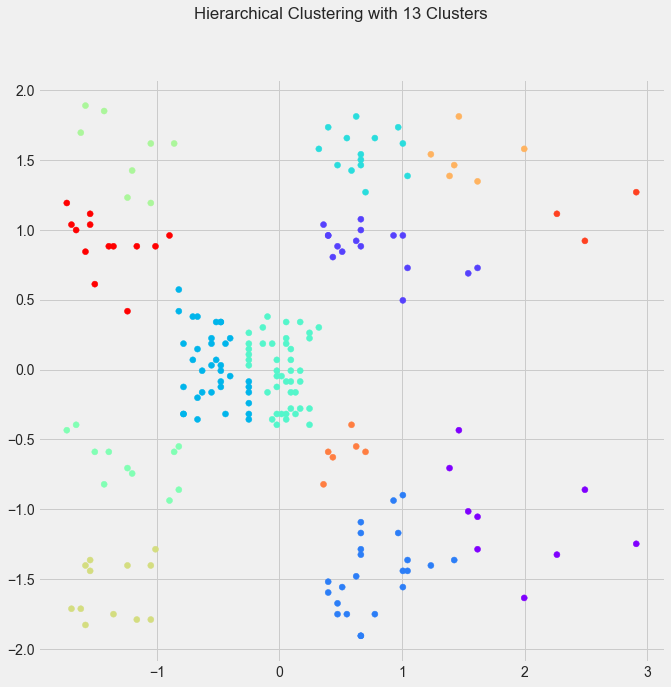

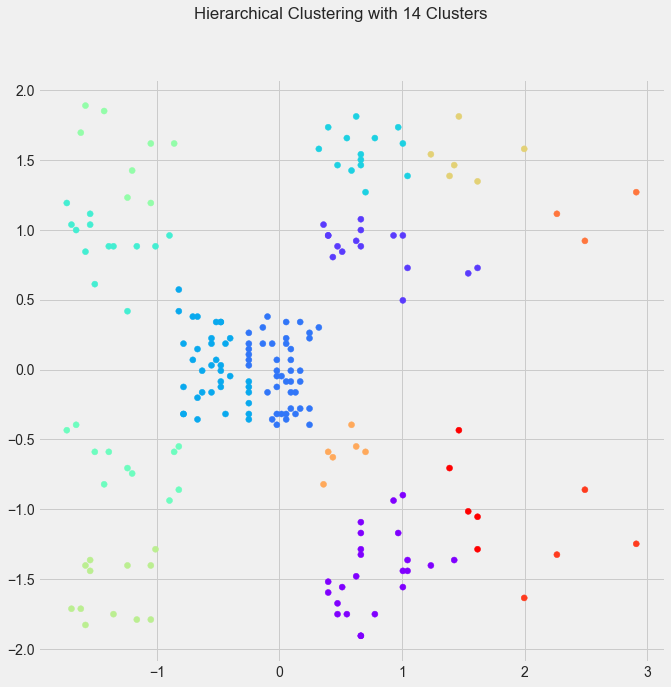

In [18]:
for i in range(2,15):

  cluster = AgglomerativeClustering(n_clusters=i, affinity='euclidean', linkage='ward')
  cluster.fit_predict(vals)

  fig = plt.figure()
 
  plt.scatter(vals[:,0], vals[:,1], c=cluster.labels_, cmap='rainbow')
  title_str = "Hierarchical Clustering with {} Clusters".format(i)
  plt.suptitle(title_str)